## Scikit-Learn course

https://inria.github.io/scikit-learn-mooc/overfit/overfit_module_intro.html

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# data
from sklearn.datasets import fetch_california_housing

# pre-processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_selector as selector, ColumnTransformer

# pipeline - model selection, metrics
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_validate, learning_curve, \
validation_curve, ShuffleSplit,train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, f1_score

# models
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV
from sklearn.ensemble import HistGradientBoostingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.impute import SimpleImputer

## Predictive Pipeline

Goals - Play with a basic processing / fit / predict pipeline on heterogeneous tabular data

In [3]:
adult_census = pd.read_csv("../data/adult_census.csv")

In [4]:
adult_census.head(3)

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [19]:
X = adult_census.drop(columns="class")
y = adult_census["class"]

### Preprocessing

In [21]:
# defining column types
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

# applying separate processing
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

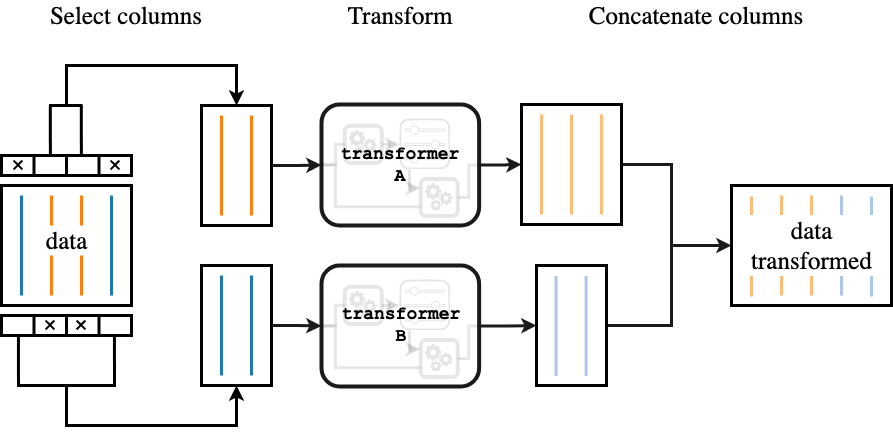

### Fitting and Evaluation

In [22]:
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

In [23]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['id', 'age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [24]:
cv_results = cross_validate(model, X, y, cv=5)
cv_results

{'fit_time': array([1.01834226, 0.86717534, 0.79164124, 0.810817  , 0.75997901]),
 'score_time': array([0.03099489, 0.0294888 , 0.02806282, 0.0390439 , 0.0321641 ]),
 'test_score': array([0.85146893, 0.85044529, 0.84930385, 0.8527846 , 0.85647011])}

In [32]:
model = LogisticRegression()
model.fit(X, y)
model.score(X, y)

ValueError: could not convert string to float: 'Private'

In [25]:
cv_results["test_score"].mean(), cv_results["test_score"].std()

(0.8520945554009328, 0.0024706738548830884)

**Ensemble model**

In [29]:
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)

preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

In [30]:
cv_results = cross_validate(model, X, y, cv=5)
cv_results

{'fit_time': array([0.85348988, 0.74407601, 0.94852805, 0.98326516, 0.67939091]),
 'score_time': array([0.05292702, 0.04531932, 0.04526806, 0.05619001, 0.05180693]),
 'test_score': array([0.83120074, 0.87183949, 0.871724  , 0.87387387, 0.81111794])}

In [31]:
cv_results["test_score"].mean(), cv_results["test_score"].std()

(0.8519512072025123, 0.025942430273477594)

## Selecting best model

Goals - 

In [92]:

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target
target*=100

In [93]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [18]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(data, target)

DecisionTreeRegressor(random_state=0)

In [23]:
target_predicted = regressor.predict(data)
MAE = mean_absolute_error(target, target_predicted)
MAPE = mean_absolute_percentage_error(target, target_predicted)
SSE = mean_squared_error(target, target_predicted)

print(round(MAE,2), round(MAPE,2), round(SSE,2))

In [25]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

In [26]:
regressor.fit(data_train, target_train)

DecisionTreeRegressor(random_state=0)

In [94]:
target_predicted = regressor.predict(data_train)
MAE = mean_absolute_error(target_train, target_predicted)
MAPE = mean_absolute_percentage_error(target_train, target_predicted)
SSE = mean_squared_error(target_train, target_predicted)

print(round(MAE,2), round(MAPE,2), round(SSE,2))

0.0 0.0 0.0


In [29]:
target_predicted = regressor.predict(data_test)
MAE = mean_absolute_error(target_test, target_predicted)
MAPE = mean_absolute_percentage_error(target_test, target_predicted)
SSE = mean_squared_error(target_test, target_predicted)

print(round(MAE,2), round(MAPE,2), round(SSE,2))

47.28 0.27 5496.09


In [58]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=40, test_size=0.3, random_state=0)
cv_results = cross_validate(
    regressor, data, target, cv=cv, scoring=["neg_mean_absolute_percentage_error", 
                                             "neg_mean_absolute_error"]) # to get a score on MAE

In [59]:
cv_results = pd.DataFrame(cv_results)
cv_results.head()

,fit_time,score_time,test_neg_mean_absolute_percentage_error,test_neg_mean_absolute_error
0,0.118480,0.002774,-0.255565,-46.909797
1,0.106630,0.002922,-0.255213,-46.421170
2,0.105255,0.002757,-0.261298,-47.411089
3,0.095441,0.002774,-0.238930,-44.319824
4,0.098294,0.002957,-0.255124,-47.607875


In [52]:
cv_results["test_error"] = -cv_results["test_score"]

<AxesSubplot:ylabel='Frequency'>

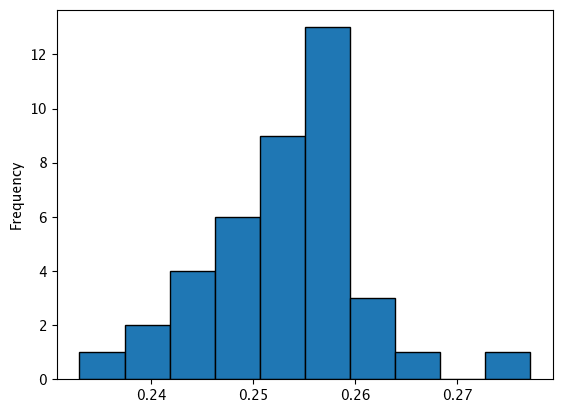

In [53]:
cv_results["test_error"].plot.hist(bins=10, edgecolor="black")

In [54]:
cv_results["test_error"].describe()

count    40.000000
mean      0.252582
std       0.007687
min       0.232927
25%       0.247439
50%       0.253398
75%       0.256496
max       0.277201
Name: test_error, dtype: float64

In [55]:
target.describe()

count    20640.000000
mean       206.855817
std        115.395616
min         14.999000
25%        119.600000
50%        179.700000
75%        264.725000
max        500.001000
Name: MedHouseVal, dtype: float64

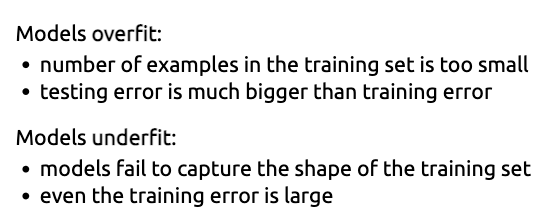

In [60]:
# looking at training score
cv = ShuffleSplit(n_splits=30, test_size=0.2)
cv_results = cross_validate(regressor, data, target,
                            cv=cv, scoring="neg_mean_absolute_error",
                            return_train_score=True, n_jobs=2)
cv_results = pd.DataFrame(cv_results)

In [61]:
scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]]

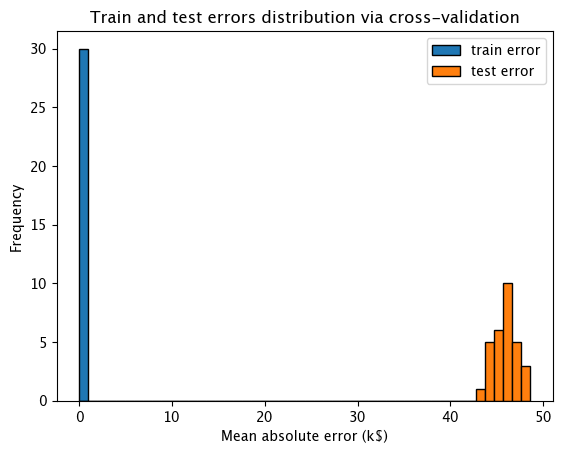

In [63]:
scores.plot.hist(bins=50, edgecolor="black")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Train and test errors distribution via cross-validation")

**Complexity estimation - validation curve (hyper-parameter tuning)**

In [96]:
max_depth = [1, 5, 10, 15, 20, 25]
train_scores, test_scores = validation_curve(
    regressor, data, target, param_name="max_depth", param_range=max_depth,
    cv=cv, scoring="neg_mean_absolute_error", n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores


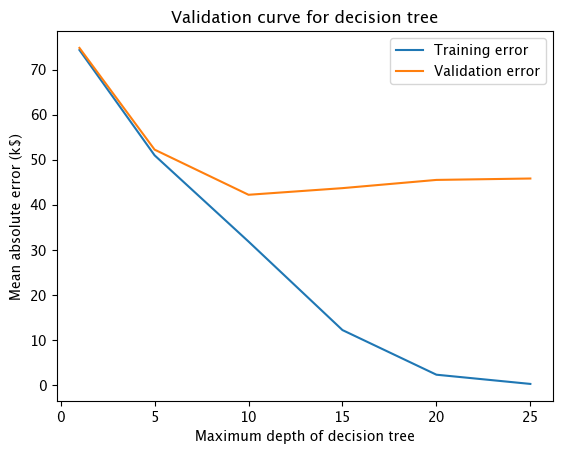

In [97]:
# mean estimates
plt.plot(max_depth, train_errors.mean(axis=1), label="Training error")
plt.plot(max_depth, test_errors.mean(axis=1), label="Validation error")
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")

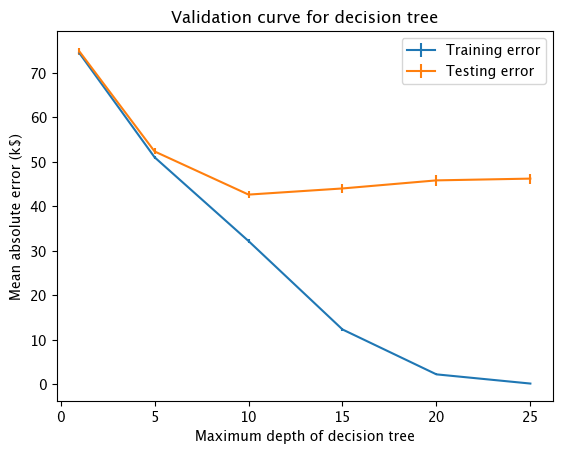

In [77]:
# std for variance
plt.errorbar(max_depth, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label='Training error')
plt.errorbar(max_depth, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label='Validation error')
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")

**Number of data points - Learning Curve**

In [70]:

train_sizes = np.linspace(0.1, 1.0, num=5, endpoint=True)
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [71]:

cv = ShuffleSplit(n_splits=30, test_size=0.2)

In [98]:
results = learning_curve(
    regressor, data, target, train_sizes=train_sizes, cv=cv,
    scoring="neg_mean_absolute_error", n_jobs=2)
train_size, train_scores, test_scores = results[:3]
# Convert the scores into errors
train_errors, test_errors = -train_scores, -test_scores

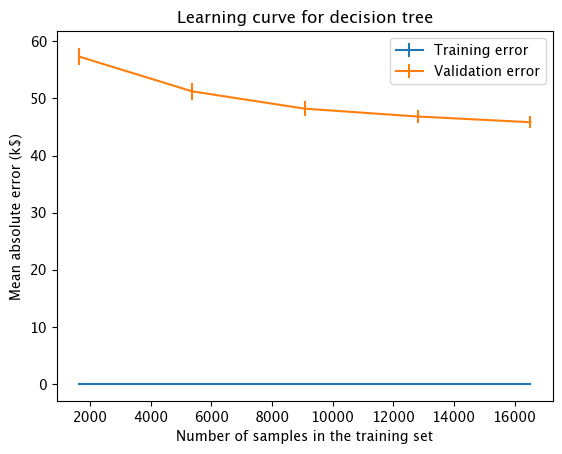

In [99]:
plt.errorbar(train_size, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label="Training error")
plt.errorbar(train_size, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label="Validation error")
plt.legend()

plt.xlabel("Number of samples in the training set")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Learning curve for decision tree")

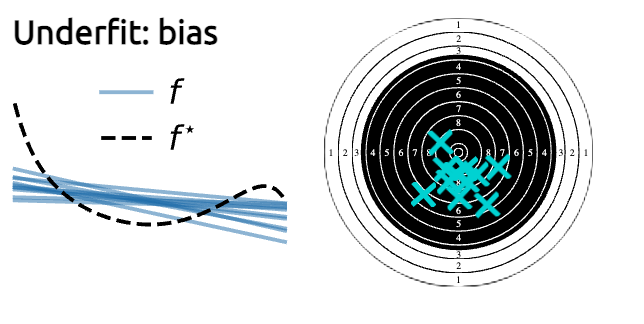
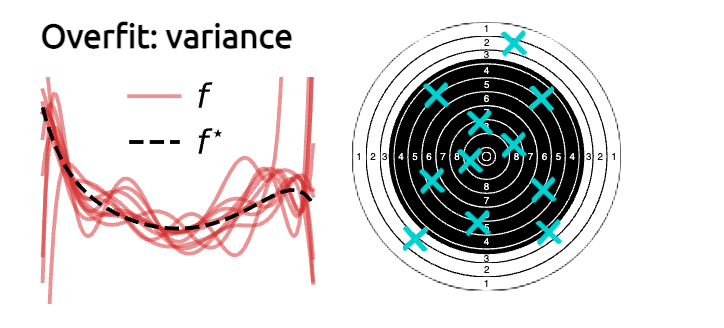
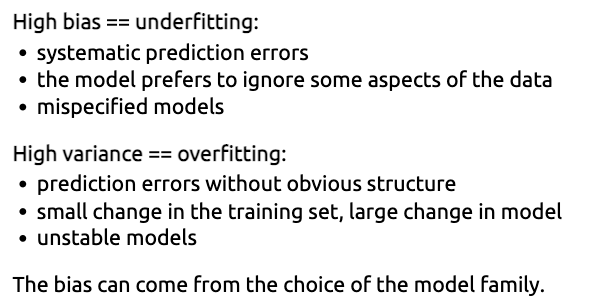

## Tuning Hyperparameters

Goals - 

hyperparameters refer to the parameter that will control the learning process.

Hyper-parameter: model dependent + value is dataset-dependent

### Manual tuning

In [3]:
adult_census = pd.read_csv("../data/adult_census.csv")

target_name = "class"
numerical_columns = [
    "age", "capital-gain", "capital-loss", "hours-per-week"]

target = adult_census[target_name]
data = adult_census[numerical_columns]

In [4]:
model = Pipeline(steps=[
    ("preprocessor", StandardScaler()),
    ("classifier", LogisticRegression())
])

In [7]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target)
scores = cv_results["test_score"]
print(f"Accuracy score via cross-validation:\n"
      f"{scores.mean():.3f} ± {scores.std():.3f}")

Accuracy score via cross-validation:
0.800 ± 0.003


In [101]:
model.set_params(classifier__C=1e-3)
cv_results = cross_validate(model, data, target)
scores = cv_results["test_score"]
print(f"Accuracy score via cross-validation:\n"
      f"{scores.mean():.3f} ± {scores.std():.3f}")

Accuracy score via cross-validation:
0.787 ± 0.002


In [102]:
model.get_params()

{'memory': None,
 'steps': [('preprocessor', StandardScaler()),
  ('classifier', LogisticRegression(C=0.001))],
 'verbose': False,
 'preprocessor': StandardScaler(),
 'classifier': LogisticRegression(C=0.001),
 'preprocessor__copy': True,
 'preprocessor__with_mean': True,
 'preprocessor__with_std': True,
 'classifier__C': 0.001,
 'classifier__class_weight': None,
 'classifier__dual': False,
 'classifier__fit_intercept': True,
 'classifier__intercept_scaling': 1,
 'classifier__l1_ratio': None,
 'classifier__max_iter': 100,
 'classifier__multi_class': 'auto',
 'classifier__n_jobs': None,
 'classifier__penalty': 'l2',
 'classifier__random_state': None,
 'classifier__solver': 'lbfgs',
 'classifier__tol': 0.0001,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

### Automated tuning

In [42]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

In [43]:
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)
preprocessor = ColumnTransformer([
    ('cat_preprocessor', categorical_preprocessor, categorical_columns)],
    remainder='passthrough', sparse_threshold=0)

#### Sklearn tuning

In [7]:
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier",
     HistGradientBoostingClassifier(random_state=42, max_leaf_nodes=4))])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat_preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [])])),
                ('classifier',
                 HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                random_state=42))])

**Grid-Search**

In [52]:
param_grid = {
    'classifier__learning_rate': (0.01, 0.1, 1, 10),
    'classifier__max_leaf_nodes': (3, 10, 30)}
model_grid_search = GridSearchCV(model, param_grid=param_grid,
                                 n_jobs=2, cv=2)
model_grid_search.fit(data_train, target_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('cat_preprocessor',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         [])])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                                       random_state=42))]),
             n_jobs=2,
             param_grid={'classifier__learning_rate': (0.01, 0.1, 1, 10),
                         'classifier__max_leaf_nodes': (3, 10, 30)})

In [112]:
model_grid_search.score(data_test, target_test)

0.8339202358529195

In [53]:
model_grid_search.best_params_

{'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 10}

In [118]:
pd.DataFrame(model_grid_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__max_leaf_nodes,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
4,0.220325,0.002520,0.062449,0.000893,0.1,10,"{'classifier__learning_rate': 0.1, 'classifier...",0.829220,0.826372,0.827796,0.001424,1
6,0.058684,0.002984,0.050712,0.000165,1,3,"{'classifier__learning_rate': 1, 'classifier__...",0.828401,0.826699,0.827550,0.000851,2
5,0.386212,0.014210,0.065905,0.000487,0.1,30,"{'classifier__learning_rate': 0.1, 'classifier...",0.828456,0.825389,0.826923,0.001533,3
7,0.056805,0.001982,0.045841,0.000444,1,10,"{'classifier__learning_rate': 1, 'classifier__...",0.825726,0.823587,0.824657,0.001069,4
8,0.076712,0.007277,0.044285,0.000085,1,30,"{'classifier__learning_rate': 1, 'classifier__...",0.825071,0.821512,0.823292,0.001779,5
2,0.441310,0.000528,0.068172,0.000359,0.01,30,"{'classifier__learning_rate': 0.01, 'classifie...",0.822396,0.819492,0.820944,0.001452,6
3,0.123392,0.001128,0.057515,0.000857,0.1,3,"{'classifier__learning_rate': 0.1, 'classifier...",0.820485,0.816817,0.818651,0.001834,7
1,0.215147,0.001916,0.061234,0.002317,0.01,10,"{'classifier__learning_rate': 0.01, 'classifie...",0.817973,0.815343,0.816658,0.001315,8
0,0.166516,0.000695,0.060425,0.000633,0.01,3,"{'classifier__learning_rate': 0.01, 'classifie...",0.800229,0.797215,0.798722,0.001507,9
9,0.036430,0.000115,0.041709,0.000070,10,3,"{'classifier__learning_rate': 10, 'classifier_...",0.529537,0.530221,0.529879,0.000342,10


**Randomized Search**

- Not all hyper-parameters are important !
- Randomized Search useful for 3+ hyper-parameters

Combining cross-validation + hyper-parameter search

#### Optuna tuning

In [44]:
import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

In [45]:
def objective(trial):

    classifier_lr = trial.suggest_float("classifier__lr", 0.01, 10, log=True)
    classifier_max_leaf_nodes = trial.suggest_int("classifier__max_leaf_nodes", 2, 20, log=True)
    
    model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier",
     HistGradientBoostingClassifier(random_state=42, 
                                    max_leaf_nodes=classifier_max_leaf_nodes,
                                    learning_rate=classifier_lr))])
    
    model.fit(data_train, encoded_target_train)

    pred_labels = model.predict(data_test)
    mse = mean_squared_error(encoded_target_test, pred_labels)
    return mse


In [46]:
# optuna needs numerical value for the label
label_encoder = LabelEncoder()

encoded_target_train = label_encoder.fit_transform(target_train)
encoded_target_test = label_encoder.fit_transform(target_test) 

In [61]:
study = optuna.create_study(
    direction="minimize")
study.optimize(objective, n_trials=50, timeout=600)

[I 2022-09-01 17:05:43,281] A new study created in memory with name: no-name-0d42d153-233b-488c-9a0a-8d9f8a5cbebb
[I 2022-09-01 17:05:43,619] Trial 0 finished with value: 0.16894603226598967 and parameters: {'classifier__lr': 0.14434355334392213, 'classifier__max_leaf_nodes': 4}. Best is trial 0 with value: 0.16894603226598967.
[I 2022-09-01 17:05:43,796] Trial 1 finished with value: 0.17508803537793793 and parameters: {'classifier__lr': 0.2674001883800003, 'classifier__max_leaf_nodes': 2}. Best is trial 0 with value: 0.16894603226598967.
[I 2022-09-01 17:05:44,017] Trial 2 finished with value: 0.17942838424371468 and parameters: {'classifier__lr': 0.04125317253032223, 'classifier__max_leaf_nodes': 3}. Best is trial 0 with value: 0.16894603226598967.
[I 2022-09-01 17:05:44,357] Trial 3 finished with value: 0.16485136352469085 and parameters: {'classifier__lr': 0.31626471867640965, 'classifier__max_leaf_nodes': 7}. Best is trial 3 with value: 0.16485136352469085.
[I 2022-09-01 17:05:44,

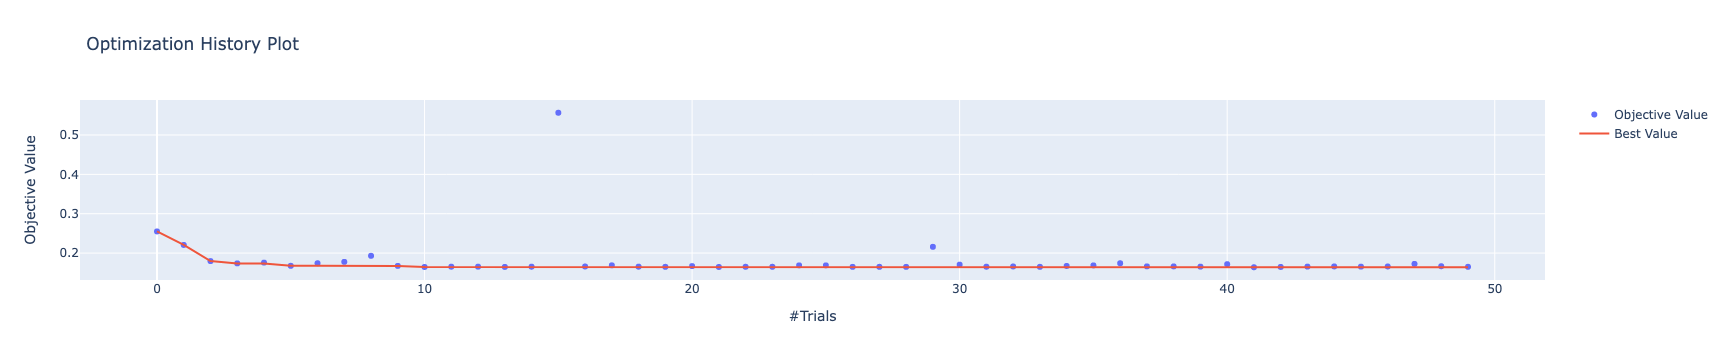

In [48]:
plot_optimization_history(study)

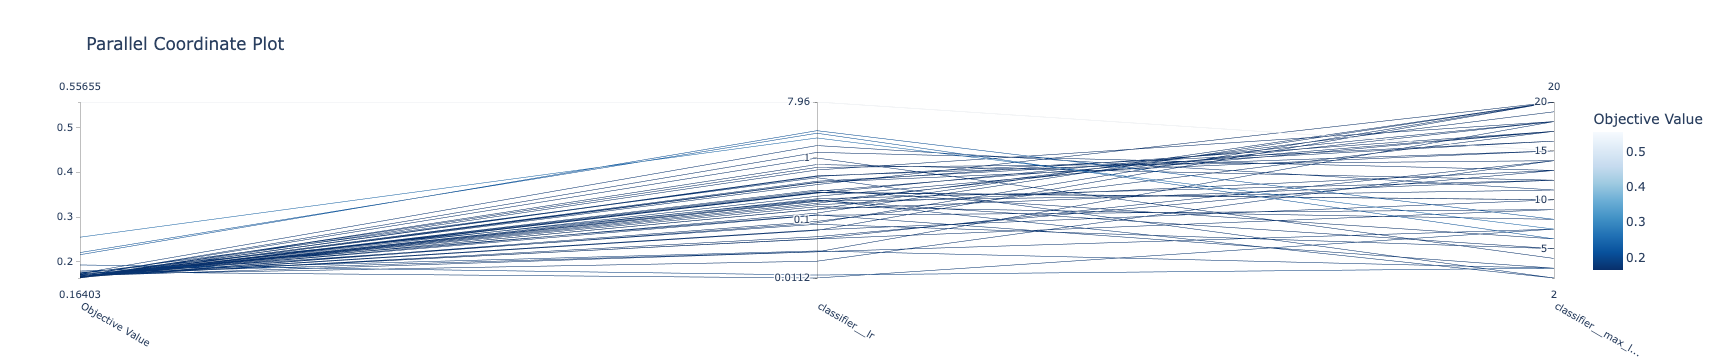

In [49]:
plot_parallel_coordinate(study)

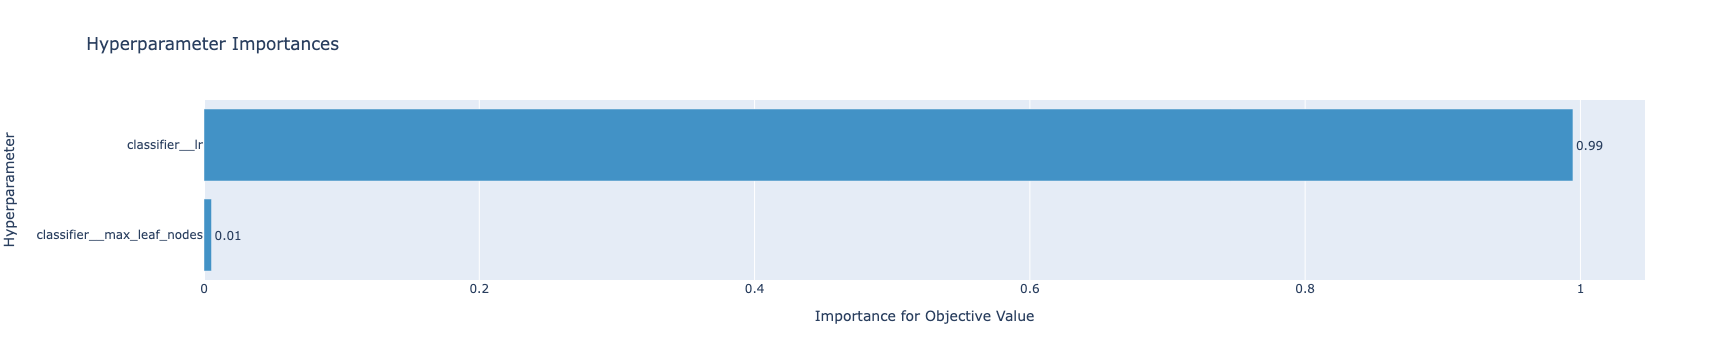

In [50]:
plot_param_importances(study)

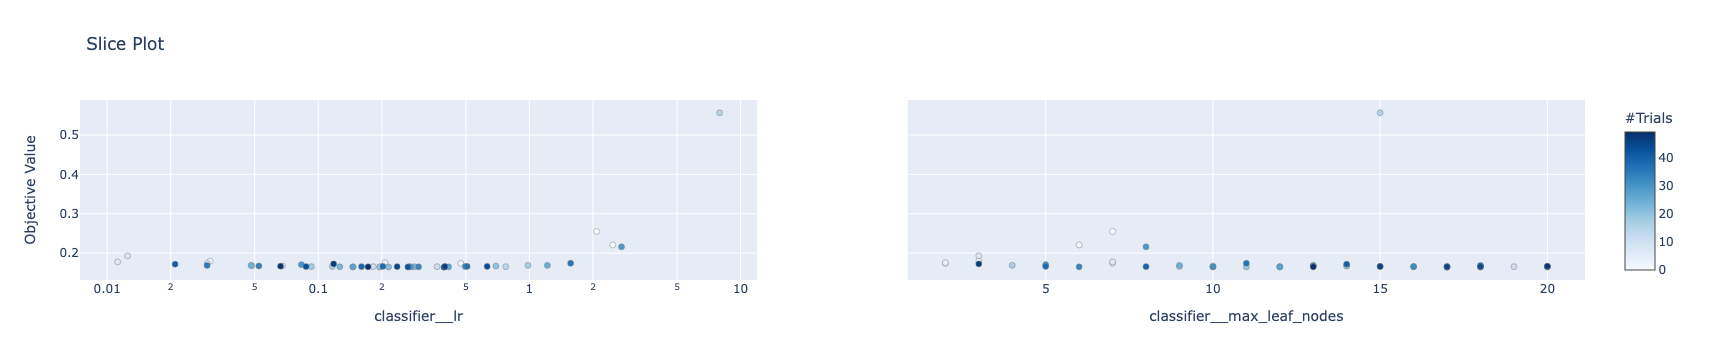

In [51]:
plot_slice(study)

## Linear Models

### How to deal with non-linear data

#### Option 1 - Non-linear features

In [3]:
# generate non-linear data
rng = np.random.RandomState(0)
n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
# sort the data to make plotting easier later
data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise

In [6]:
data = data.reshape((-1, 1))
linear_regression = LinearRegression()
linear_regression.fit(data, target)
target_predicted = linear_regression.predict(data)

In [11]:
full_data = pd.DataFrame({"input_feature": data.flatten(), "target": target})

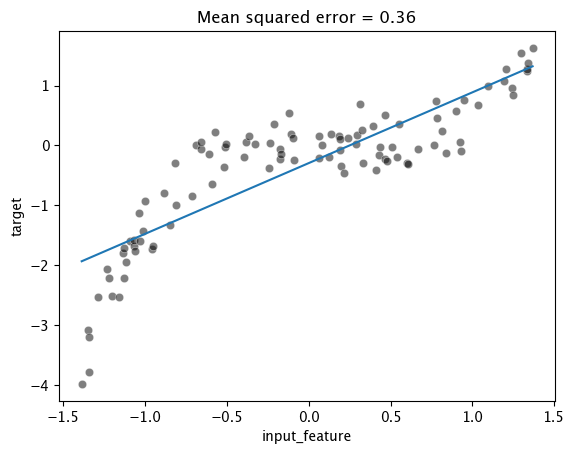

In [16]:
mse = mean_squared_error(target, target_predicted)
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

In [17]:
# add non-linear features amounts to polynomial regression
data_expanded = np.concatenate([data, data ** 2, data ** 3], axis=1)

In [19]:
data_expanded.shape

(100, 3)

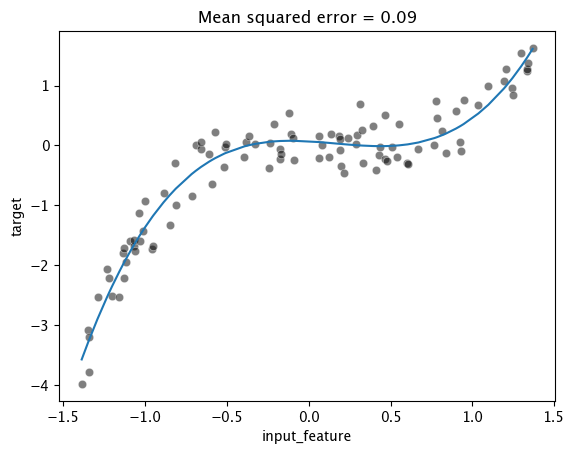

In [20]:
linear_regression.fit(data_expanded, target)
target_predicted = linear_regression.predict(data_expanded)
mse = mean_squared_error(target, target_predicted)
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

In [22]:
# sklearn has a function for this
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    LinearRegression(),
)
polynomial_regression.fit(data, target)
target_predicted = polynomial_regression.predict(data)
mse = mean_squared_error(target, target_predicted)
print(mse)

0.08500867073351062


#### Option 2 - Non-linear model

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3).fit(data, target)
target_predicted = tree.predict(data)
mse = mean_squared_error(target, target_predicted)
print(mse)

0.07644441104041694


#### Option 3 - kernel-based approach

Weights are not for each feature but for some samples 

In [26]:
from sklearn.svm import SVR

def train(model, data, target):
    model.fit(data, target)
    mse = mean_squared_error(target, model.predict(data))
    return mse

In [28]:
svc = SVR(kernel="linear")
train(svc, data, target)

0.3657305575022827

In [29]:
svc = SVR(kernel="poly", degree=3)
train(svc, data, target)

0.18283101635517834

### Regularization

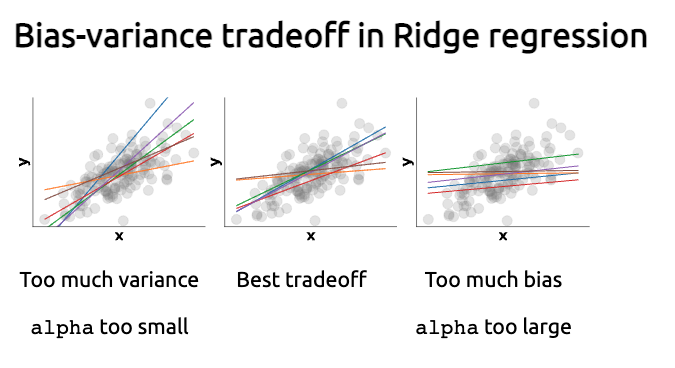

In [30]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(as_frame=True, return_X_y=True)
target *= 100  # rescale the target in k$
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
from sklearn.linear_model import Ridge

ridge = make_pipeline(PolynomialFeatures(degree=2),
                      Ridge(alpha=100))
cv_results = cross_validate(ridge, data, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

In [34]:
model_first_fold = cv_results["estimator"][0]

feature_names = model_first_fold[0].get_feature_names_out(
    input_features=data.columns)
feature_names

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

In [32]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} ± {train_error.std():.3f}")

Mean squared error of linear regression model on the train set:
4373.180 ± 153.942


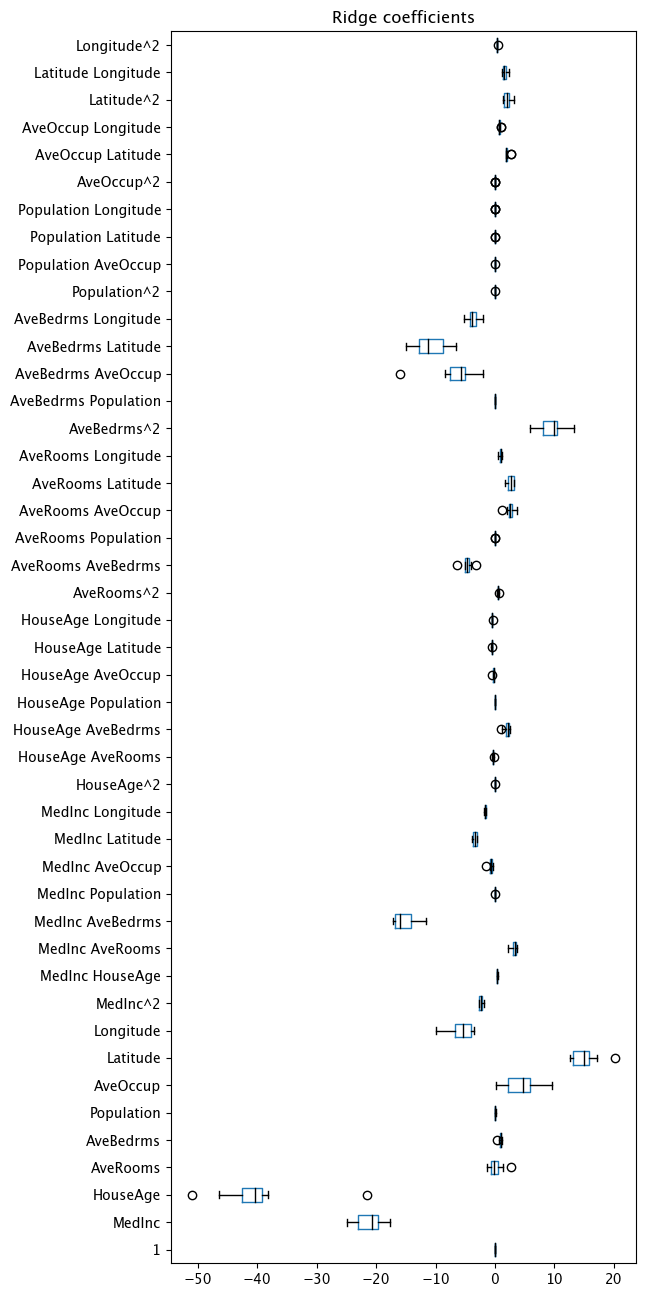

In [36]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)
color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge coefficients")

--> regularization will produce more homogeneous weights for each feature

Important factors
- Feature scaling
- Fine-tune regularization strength

In [39]:
# fine-tuning with CV
alphas = np.logspace(-2, 0, num=20)
ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),
                      RidgeCV(alphas=alphas, store_cv_values=True))
cv = ShuffleSplit(n_splits=5, random_state=1)
cv_results = cross_validate(ridge, data, target,
                            cv=cv, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=2)

In [40]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} ± {train_error.std():.3f}")

Mean squared error of linear regression model on the train set:
4306.562 ± 25.918


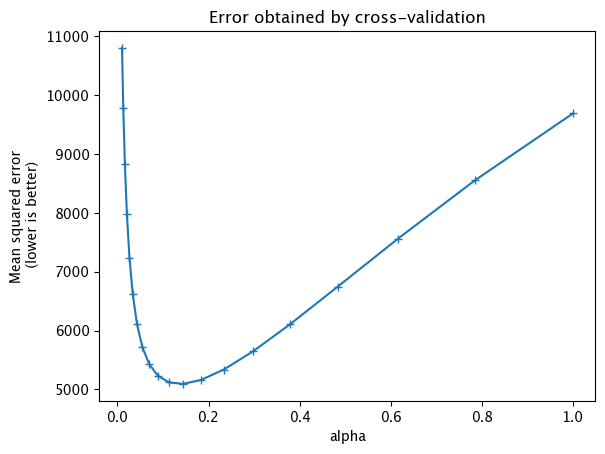

In [42]:
mse_alphas = [est[-1].cv_values_.mean(axis=0)
              for est in cv_results["estimator"]]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas.mean(axis=0).plot(marker="+")
plt.ylabel("Mean squared error\n (lower is better)")
plt.xlabel("alpha")
_ = plt.title("Error obtained by cross-validation")

### Logistic Regression

Linear model for classification

## Decision Tree Models

### Classification

In [54]:
penguins = pd.read_csv("../data/penguins_lter.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

In [59]:
linear_pipe = Pipeline(steps=
                       [("imputer", SimpleImputer(strategy="most_frequent")),
                       ("lr", LogisticRegression())])

In [60]:
linear_pipe.fit(data_train, target_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('lr', LogisticRegression())])

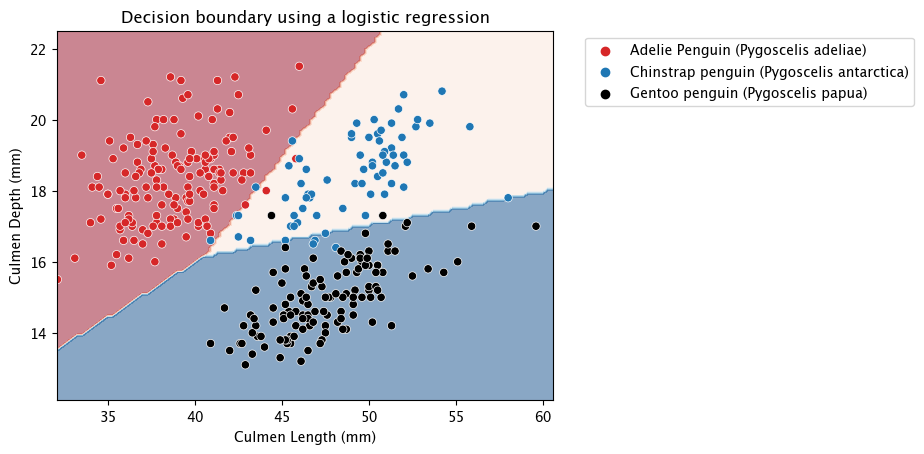

In [62]:
from sklearn.inspection import DecisionBoundaryDisplay

# create a palette to be used in the scatterplot
palette = ["tab:red", "tab:blue", "black"]

DecisionBoundaryDisplay.from_estimator(
    linear_pipe, data_train, response_method="predict", cmap="RdBu", alpha=0.5
)
sns.scatterplot(data=penguins, x=culmen_columns[0], y=culmen_columns[1],
                hue=target_column, palette=palette)
# put the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Decision boundary using a logistic regression")

Unlike linear models, decision trees are non-parametric models: they are not controlled by a mathematical decision function and do not have weights or intercept to be optimized.

Indeed, decision trees will partition the space by considering a single feature at a time

In [66]:
tree_pipe = Pipeline(steps=
                       [("imputer", SimpleImputer(strategy="most_frequent")),
                       ("lr", DecisionTreeClassifier(max_depth=1))])

In [67]:
tree_pipe.fit(data_train, target_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('lr', DecisionTreeClassifier(max_depth=1))])

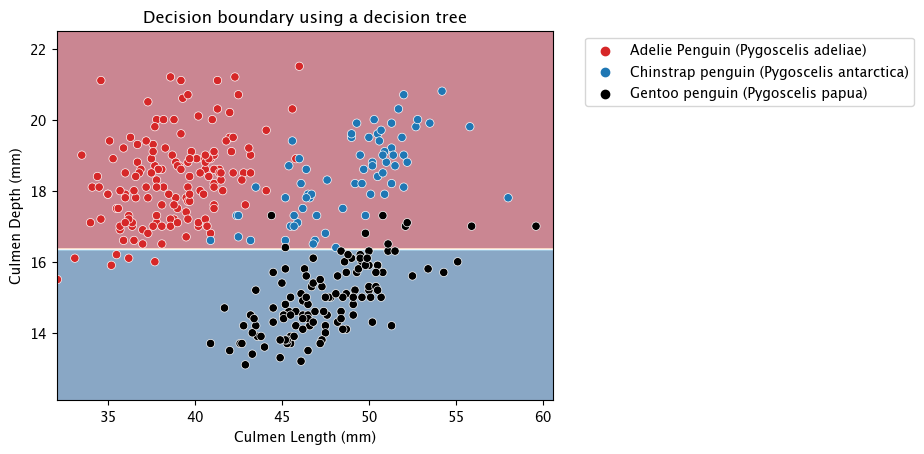

In [68]:
DecisionBoundaryDisplay.from_estimator(
    tree_pipe, data_train, response_method="predict", cmap="RdBu", alpha=0.5
)b
sns.scatterplot(data=penguins, x=culmen_columns[0], y=culmen_columns[1],
                hue=target_column, palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Decision boundary using a decision tree")

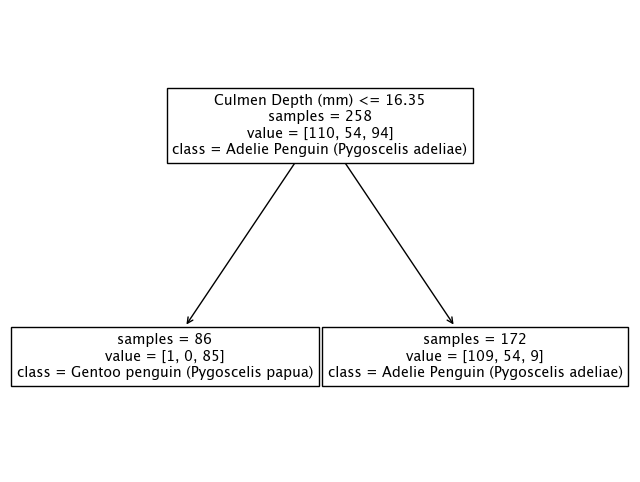

In [76]:
_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree_pipe[1], feature_names=culmen_columns,
              class_names=tree_pipe[1].classes_, impurity=False, ax=ax)

### Regression

In [77]:
penguins = pd.read_csv("../data/penguins_lter.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]


In [78]:
data_test = pd.DataFrame(np.arange(data_train[feature_name].min(),
                                   data_train[feature_name].max()),
                                   columns=[feature_name])

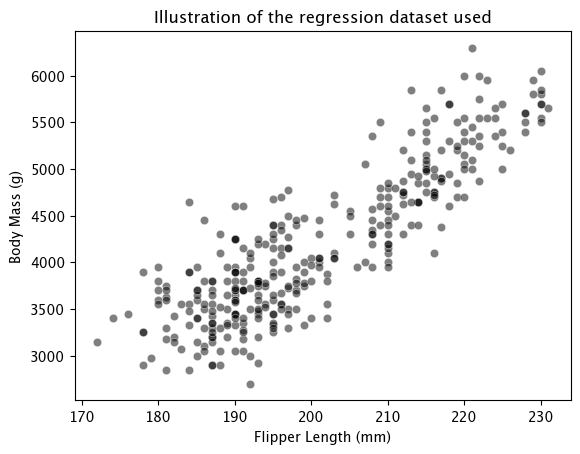

In [79]:
sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
_ = plt.title("Illustration of the regression dataset used")

### Hyper-parameters

- max_depth: overall complexity but does not affect assymetry of a tree
- min_samples_leaf: threshold to be considered as a leaf node
- min_samples_split: threshold to split a node
- max_leaf_nodes: grow until it reaches this max and then prune based on impurity
- min_impurity_decrease: threshold to be split if improvement in impurity is enough

## Ensemble

### Bootstrapping

- Bagging (Boostrap Aggregating), Random Forest
- Bootstrap = sampling with replacement for training -> this introduces variances on the data to learn different classifiers
- Aggregating = average predictions of individual learners

In sklearn, bagging acts as an estimator on an estimator, similar to GridSearch. It can also be applied to a Pipeline object!

- Random Forest -> base estimator is always a tree + each tree only sees a subset of features
- Goal = deccorelate prediction errors between individual trees to maximize performance of overall model

Hyper-parameters:
- max_features: % of feature to consider for a given tree, default to the square number of features for classification
- n_estimators: how many weak trees to consider? Tradeoff between accuracy and training/inference time
- max_depth and max_leaf_nodes of each tree. Usually deep trees because we aim at overfitting

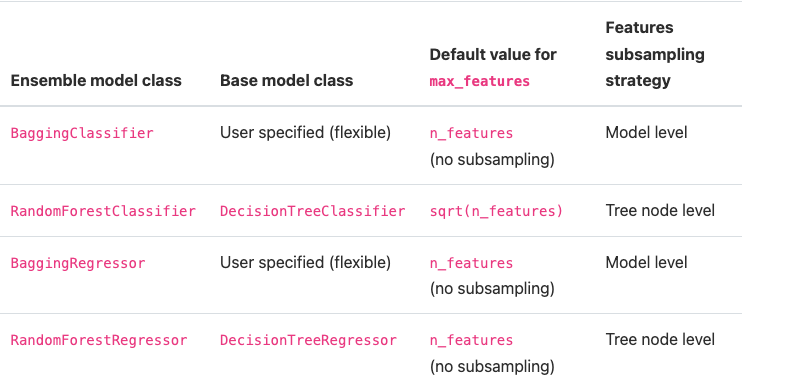

### Boosting

AdaBoost, XGboost

- Adaboost = adaptive weigth to adjust predictions on samples with errors
- Gradient Boosting = model predicts negative error of previous model
    - exact method only works for small datasets (<10k)
    - approximation method works  

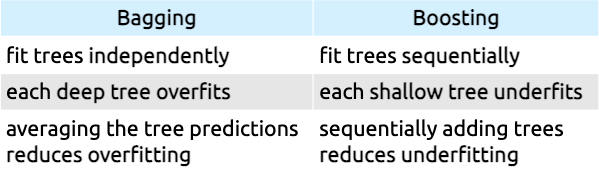

To summarize, boosting learns several classifiers, each of which will focus more or less on specific samples of the dataset. Boosting is thus different from bagging: here we never resample our dataset, we just assign different weights to the original dataset.

Boosting requires some strategy to combine the learners together:

one needs to define a way to compute the weights to be assigned to samples;

one needs to assign a weight to each learner when making predictions.

- Gradient Boosting -> predict errors of previous models instead of predicting targets so each model underfits on residuals insead of overfitting and they are shallow models so way faster to predict than for bagging
- But training cannot be parallelized since there is a dependency between estimators contrary to RandomForests

Hyper-parameters
- n_estimators * max_depth ~ constant. Goal is to have weak learners so depth between 3 and 8.
- learning_rate: 
- early stopping also possible with param n_iter_no_change

## Evaluating Model Performance

Goals - 

- Baseline
   - Dummy (mean/median or most frequent value)
   - Different types of cross-validation